<a href="https://colab.research.google.com/github/Prajwayne/Natural-language-/blob/main/Amazon%20Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Data Analytics Coursework -- Text Analytics Data Loader

For this coursework, we recommend that you use your virtual environment that you created for the labs. Alternatively, create a fresh environment following the instructions below. 

### Setting up your environment

We recommend using ```conda``` to create an environment with the correct versions of all the packages you need for these labs. You can install either Anaconda or Miniconda, which will include the ```conda``` program. 

We provide a .yml file that lists all the packages you will need, and the versions that we have tested the labs with. You can use this file to create your environment as follows.

1. Open a terminal. Use the command line to navigate to the directory containing this notebook and the file ```crossplatform_environment.yml```. You can use the command ```cd``` to change directory on the command line.

1. If necessary, edit the file ```crossplatform_environment.yml``` to change the name of your new environment. By default, it's called 'data_analytics'. s

1. Run conda by typing ```conda env create -f crossplatform_environment.yml```, then answer any questions that appear on the command line.

1. Activate the environment by running the command ```conda activate data_analytics```.

1. Make the kernel available in Jupyter: ```python -m ipykernel install --user --name=data_analytics```.

1. Relaunch Jupyter: shutdown any running instances, and then type ```jupyter lab``` or ```jupyter notebook``` into your command line, depending on whether you prefer the full Jupyter lab development environment, or the simpler Jupyter notebook.

1. Find this notebook and open it up again.

1. Go to the top menu and change the kernel: click on 'Kernel'--> 'Change kernel' --> data_analytics.

In [ ]:
# install datasets
!pip install datasets

# Make sure that we have a recent version of pyarrow in the session before we continue - otherwise reboot Colab to activate it
import pyarrow
if int(pyarrow.__version__.split('.')[1]) < 16 and int(pyarrow.__version__.split('.')[0]) == 0:
    import os
    os.kill(os.getpid(), 9)

In [ ]:
%load_ext autoreload
%autoreload 2

# Use HuggingFace's datasets library to access the financial_phrasebank dataset
from datasets import load_dataset

In [ ]:
# Let's import the library. We typically only need at most four methods:
from datasets import list_datasets, list_metrics, load_dataset, load_metric

from pprint import pprint

# Amazon Reviews

In [ ]:
dataset = load_dataset(
    "amazon_reviews_multi", 
    'en' # Select language of the dataset
)

print(f'The dataset is a dictionary with two splits: \n\n{dataset}')

The dataset already contains a test split, which we can hold out until we have tuned our method(s), and a validation split that we could use to tune hyperparameters.

The training set is very large, so you may wish to work with a subset of the training data.

In [ ]:
train_documents = dataset["train"]['review_body']
print(train_documents[0])

train_labels = dataset["train"]['stars']
print(train_labels[0])

print(len(train_labels))

val_documents = dataset["validation"]['review_body']
print(val_documents[0])

val_labels = dataset["validation"]['stars']
print(val_labels[0])

print(len(val_labels))

test_documents = dataset["test"]['review_body']
print(test_documents[0])

test_labels = dataset["test"]['stars']
print(test_labels[0])

print(len(test_labels))

Arrived broken. Manufacturer defect. Two of the legs of the base were not completely formed, so there was no way to insert the casters. I unpackaged the entire chair and hardware before noticing this. So, I'll spend twice the amount of time boxing up the whole useless thing and send it back with a 1-star review of part of a chair I never got to sit in. I will go so far as to include a picture of what their injection molding and quality assurance process missed though. I will be hesitant to buy again. It makes me wonder if there aren't missing structures and supports that don't impede the assembly process.
1
200000
Pathetic design of the caps. Very impractical to use everyday. The caps close so tight that everyday we have to wrestle with the bottle to open the cap. With a baby in one hand opening the cap is a night mare. And on top of these extra ordinary features of super secure cap, they are so expensive when compared to other brands. Stay away from these until they fix the cap issues

In [ ]:
from sklearn.model_selection import train_test_split

# Split test data from training data
train_documents, unused_documents, train_labels, unused_labels = train_test_split(
    train_documents, 
    train_labels, 
    test_size=0.9, 
    stratify=train_labels  # make sure the same proportion of labels is in the test set and training set
)

In [ ]:
# label 0 = negative, 1 = neutral, 2 = positive
print(f'How many instances in the train dataset? \n\n{len(train_documents)}')
print('')
print(f'What does one instance look like? \n\n{train_documents[234]}')

How many instances in the train dataset? 

20000

What does one instance look like? 

Love movie and it is not on the usually streaming channels


In [ ]:
dataset_id="amazon_reviews_multi"
dataset_config="en"



In [ ]:
from datasets import load_dataset

dataset = load_dataset(dataset_id,dataset_config)

In [ ]:
from datasets import ClassLabel

def map_start_to_label(review):
  if review["stars"] < 3:
    review["stars"] = 0
  elif review["stars"] == 3:
    review["stars"] = 1
  else:
    review["stars"] = 2
  return review

# convert 1-5 star reviews to 0,1,2
dataset = dataset.map(map_start_to_label)

# convert feature from Value to ClassLabel
class_feature =  ClassLabel(names=['negative','neutral', 'positive'])
dataset = dataset.cast_column("stars", class_feature)

# rename our target column to labels
dataset = dataset.rename_column("stars","labels")

# drop columns that are not needed
dataset = dataset.remove_columns(['review_id', 'product_id', 'reviewer_id', 'review_title', 'language', 'product_category'])

In [ ]:
df.review_body

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

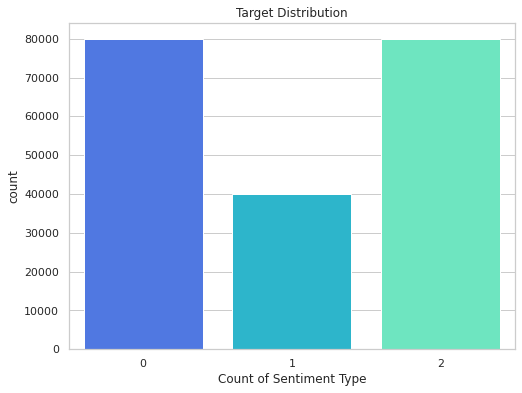

<Figure size 432x288 with 0 Axes>

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_palette('rainbow')
plt.figure(figsize=(8,6))
sns.countplot(x=df.labels)
plt.xlabel('Count of Sentiment Type')
plt.title('Target Distribution')
plt.show()
plt.savefig('Target Distribution')

In [ ]:
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

# Split test data from training data
train_sentences, test_sentences, train_labels, test_labels = train_test_split(
    df['review_body'], 
    df['labels'], 
    test_size=0.9,
    stratify=df['labels'] 
)

In [ ]:
len(train_sentences)

20000

In [ ]:

frame = ((train_sentences,train_labels))

In [ ]:
type(train_sentences)

pandas.core.series.Series

In [ ]:
train_sentences

In [ ]:
import pandas as pd

products_list = train_sentences

df1 = pd.DataFrame (products_list, columns = ['review_body'])
print (df1)

Reducing the dataset 

In [ ]:
import pandas as pd

products_list = train_labels

df2 = pd.DataFrame (products_list, columns = ['labels'])
print (df2)

In [ ]:
data1 = pd.concat([df1, df2], axis=1, join= 'inner')
display(data1)

In [ ]:
data1['review_body'].isnull().values.any()

False

In [ ]:
from sklearn.model_selection import train_test_split

# Split test data from training data
trainsent, testsent, train_lab, test_lab = train_test_split(
    data1['review_body'], 
    data1['labels'], 
    test_size=0.2,
    stratify=data1['labels'] 
)

Tokenization 

First step in any nlp pipeline is tokenizing text i.e breaking down paragraphs into sentenses and then sentenses into words, punctuations and so on.

we will load english language model to tokenize our english text.

Every language is different and have different rules. Spacy offers 8 different language models.

In [ ]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
from spacy.util import minibatch, compounding

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
spacy_tok = spacy.load('en_core_web_sm')
sample_review=df.review_body[54]
sample_review

'Seemed like a nice pen, but I couldn’t even get a decent line out of it. Disappointing.'

took out the quotation marks 

In [ ]:
parsed_review = spacy_tok(sample_review)
parsed_review

Seemed like a nice pen, but I couldn’t even get a decent line out of it. Disappointing.

In [ ]:
!wget https://raw.githubusercontent.com/tylerneylon/explacy/master/explacy.py

--2022-08-10 09:09:56--  https://raw.githubusercontent.com/tylerneylon/explacy/master/explacy.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6896 (6.7K) [text/plain]
Saving to: ‘explacy.py.2’

explacy.py.2        100%[===================>]   6.73K  --.-KB/s    in 0s      

2022-08-10 09:09:56 (58.9 MB/s) - ‘explacy.py.2’ saved [6896/6896]



Part-of-speech tagging
After tokenization we can parse and tag variety of parts of speech to paragraph text. SpaCy uses statistical models in background to predict which tag will go for each word(s) based on the context.

Lemmatization
It is the process of extracting uninflected/base form of the word. Lemma can be like

In [ ]:
tokenized_text = pd.DataFrame()

for i, token in enumerate(parsed_review):
    tokenized_text.loc[i, 'text'] = token.text
    tokenized_text.loc[i, 'lemma'] = token.lemma_,
    tokenized_text.loc[i, 'pos'] = token.pos_
    tokenized_text.loc[i, 'tag'] = token.tag_
    tokenized_text.loc[i, 'dep'] = token.dep_
    tokenized_text.loc[i, 'shape'] = token.shape_
    tokenized_text.loc[i, 'is_alpha'] = token.is_alpha
    tokenized_text.loc[i, 'is_stop'] = token.is_stop
    tokenized_text.loc[i, 'is_punctuation'] = token.is_punct

In [ ]:
from datasets import load_dataset
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer

In [ ]:
# Setup
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
nltk.download('omw-1.4')
import pandas as pd
import matplotlib.pyplot as plt
import io
import unicodedata
import numpy as np
import re
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
#Test preprocessing
def cleanText(text):
    """
    function to clean the text,
    all methods are explained here
    """
    
    lemma = WordNetLemmatizer()
    stp = stopwords.words('english')
    
    # removing everything except alphabetical and numerical characters
    text = re.sub("[^a-zA-Z0-9]"," ",text)
    
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [lemma.lemmatize(word) for word in text]
    text = [word for word in text if word not in stp]
    text = " ".join(text)
    
    return text

In [ ]:
# cleaning the train and test documents
train_sentences = list(map(cleanText, trainsent))
test_sentences = list(map(cleanText, testsent))

In [ ]:
import pandas as pd
import numpy as np
#import nltk
#from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score,accuracy_score
import pickle

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.utils import resample
from sklearn.metrics import classification_report

#Implementation 

In [ ]:
SD_clf = Pipeline([('cv', CountVectorizer(ngram_range=(1,2))),('clf',  SGDClassifier(class_weight = 'balanced',max_iter=10000,n_iter_no_change=10))])

In [ ]:
SD_clf.fit(trainsent, train_lab)

In [ ]:
y_pred = SD_clf.predict(testsent)
pd.DataFrame(classification_report(y_pred,test_lab,output_dict=True)).T

,precision,recall,f1-score,support
0,0.760625,0.707147,0.732912,1721.00000
1,0.320000,0.401254,0.356050,638.00000
2,0.792500,0.772700,0.782475,1641.00000
accuracy,0.685250,0.685250,0.685250,0.68525
macro avg,0.624375,0.627033,0.623812,4000.00000
weighted avg,0.703422,0.685250,0.693135,4000.00000


In [ ]:
vectorise = CountVectorizer()



In [ ]:
weights = SD_clf['clf'].coef_
features = SD_clf['cv'].get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# ConfusionMatrixDisplay(cm).plot()

In [ ]:
print(f"Micro Average Precision Score = {precision_score(test_lab, y_pred, average='micro')}")
print(f"Micro Average Recall Score = {recall_score(test_lab, y_pred, average='micro')}")
print(f"Micro Average  F1-Score = {f1_score(test_lab, y_pred, average='micro')}")

Micro Average Precision Score = 0.68525
Micro Average Recall Score = 0.68525
Micro Average  F1-Score = 0.68525


check weights 

In [ ]:
weights.shape

(3, 197557)

In [ ]:
top_features_bad = weights[2].argsort()[:20]

In [ ]:
top_features_neutral = weights[1].argsort()[:20]

In [ ]:
top_features_good = weights[0].argsort()[:20]

In [ ]:
features = np.array(features)

In [ ]:
features[top_features_bad]

array(['disappointed', 'not very', 'unfortunately', 'horrible',
       'great but', 'not worth', 'broke', 'not great', 'size was',
       'stopped', 'smaller than', 'guess', 'not happy', 'product good',
       'larger than', 'doesn', 'price but', 'fits little', 'to small',
       'some work'], dtype='<U54')

In [ ]:
features[top_features_neutral]

array(['but smaller', 'was much', 'the next', 'program', 'works as',
       'but otherwise', 'it little', 'long but', 'bass', 'as pictured',
       'expected and', 'are the', 'return it', 'money', 'for small',
       'is perfect', 'cute little', 'aware', 'and did', 'works they'],
      dtype='<U54')

In [ ]:
features[top_features_good]

array(['not bad', 'not too', 'awesome', 'looked cheap', 'perfect',
       'then thought', 'accessories', 'attractive', 'great', 'loves',
       'expecting it', 'works well', 'sturdy', 'would buy', 'likes',
       'amazing', 'back for', 'very sturdy', 'in damaged', 'package at'],
      dtype='<U54')

these are the top features on which our model predicts 

In [ ]:
pip install eli5

features and their weights 

In [ ]:
import eli5

In [ ]:
eli5.explain_weights(SD_clf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Explanation(estimator="Pipeline(steps=[('cv', CountVectorizer(ngram_range=(1, 2))),\n                ('clf',\n                 SGDClassifier(class_weight='balanced', max_iter=10000,\n                               n_iter_no_change=10))])", description="\nFeatures with largest coefficients per class.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='junk', weight=1.0695206230314156, std=None, value=None), FeatureWeight(feature='horrible', weight=0.9625685607282721, std=None, value=None), FeatureWeight(feature='much smaller', weight=0.9447432170110927, std=None, value=None), FeatureWeight(feature='wouldn', weight=0.912063420196235, std=None, value=None), FeatureWeight(feature='wasn what', weight=0.8764127327618568, std=None, value=None), FeatureWeight(feature='terrible', weight=0.8259075922298151, std=None, value=None), FeatureWeight(feature='not happy', weight=0.8259075922298146, std=None, value=None), FeatureWeight(feature='useless', weight=0.8199658109907474, std=None, value=None), FeatureWeight(feature='fine but', weight=0.816994920371225, std=None, value=None), FeatureWeight(feature='not received', weight=0.8021404672735639, std=None, value=None), FeatureWeight(feature='nothing', weight=0.7813442329368371, std=None, value=None), FeatureWeight(feature='one works', weight=0.7724315610782453, std=None, value=None), FeatureWeight(feature='waste', weight=0.7635188892196451, std=None, value=None), FeatureWeight(feature='not good', weight=0.7546062173610579, std=None, value=None)], neg=[FeatureWeight(feature='not bad', weight=-1.2804538570181634, std=None, value=None), FeatureWeight(feature='on time', weight=-0.8615582796641951, std=None, value=None), FeatureWeight(feature='not too', weight=-0.8526456078055956, std=None, value=None), FeatureWeight(feature='note', weight=-0.8080822485126202, std=None, value=None), FeatureWeight(feature='perfectly', weight=-0.8080822485126197, std=None, value=None), FeatureWeight(feature='awesome', weight=-0.7724315610782441, std=None, value=None)], pos_remaining=69746, neg_remaining=78603), proba=None, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='didn love', weight=1.494479846289509, std=None, value=None), FeatureWeight(feature='good products', weight=1.2670590001150186, std=None, value=None), FeatureWeight(feature='for water', weight=1.1630951847209643, std=None, value=None), FeatureWeight(feature='really have', weight=1.1306064924103223, std=None, value=None), FeatureWeight(feature='most part', weight=1.0461358924026491, std=None, value=None), FeatureWeight(feature='product way', weight=1.0396381539405313, std=None, value=None), FeatureWeight(feature='described happy', weight=1.0396381539405302, std=None, value=None), FeatureWeight(feature='product thanks', weight=1.0201449385541446, std=None, value=None), FeatureWeight(feature='in ear', weight=1.0071494616298902, std=None, value=None), FeatureWeight(feature='the didnt', weight=1.0071494616298895, std=None, value=None), FeatureWeight(feature='one suction', weight=1.0071494616298895, std=None, value=None), FeatureWeight(feature='bag cheaply', weight=1.0071494616298884, std=None, value=None), FeatureWeight(feature='small in', weight=0.9876562462435028, std=None, value=None), FeatureWeight(feature='uncomfortable to', weight=0.9811585077813684, std=None, value=None), FeatureWeight(feature='looking work', weight=0

#Term frequency and Inverse document frequncy 

In [ ]:
# Creating pipeline for feature extraction
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(solver = 'liblinear'))
])

In [ ]:
hyperparameters = {
    'tfidf__max_df': (0.5 ,0.7, 1.0),
    'tfidf__ngram_range': ((1,1), (1,2)),
    'tfidf__use_idf': (True, False),
    'tfidf__analyzer': ('word', 'char', 'char_wb'),
    'clf__penalty': ('l2', 'l1'),
    'clf__C': (1,2)
}

In [ ]:
#create GridSearch object
classifier = GridSearchCV(pipe, hyperparameters, n_jobs=-1, cv = None)

In [ ]:
classifier.fit(trainsent, train_lab)

In [ ]:
classifier.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.7, ngram_range=(1, 2))),
                ('clf', LogisticRegression(C=2, solver='liblinear'))])

In [ ]:
#Best score and para
classifier.best_params_

In [ ]:
classifier.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.5, ngram_range=(1, 2))),
                ('clf', LogisticRegression(C=2, solver='liblinear'))])

In [ ]:
y_pred = classifier.predict(test_sentences)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [ ]:
print(classification_report(test_lab, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1600
           1       0.51      0.05      0.10       800
           2       0.64      0.88      0.74      1600

    accuracy                           0.66      4000
   macro avg       0.62      0.56      0.52      4000
weighted avg       0.64      0.66      0.60      4000



In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

In [ ]:
cm = confusion_matrix(test_lab, y_pred)
print(cm)

[[1207   28  365]
 [ 327   42  431]
 [ 193   25 1382]]


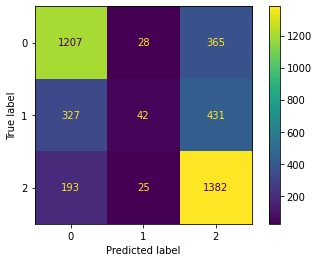

In [ ]:
ConfusionMatrixDisplay(cm).plot()